<a href="https://colab.research.google.com/github/BrainConnection/Small_Project/blob/main/IEC_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setting

In [29]:
!pip install scipy
!pip install numpy
!pip install matplotlib

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# LAB 1 Pre-Lab

In [ ]:
v = [
    -2.6, -2.55, -2.5, -2.45, -2.4, -2.35, -2.3, -2.25, -2.2, -2.15, -2.1, -2.05, -2.0, -1.95, -1.9, -1.85,
    -1.8, -1.75, -1.7, -1.65, -1.6, -1.55, -1.5, -1.45, -1.4, -1.35, -1.3, -1.25, -1.2, -1.15, -1.1, -1.05,
    -1.0, -0.95, -0.9, -0.85, -0.8, -0.75, -0.7, -0.65, -0.6, -0.55, -0.5, -0.45, -0.4, -0.35, -0.3, -0.25,
    -0.2, -0.15, -0.1, -0.05, -9.575660e-16, 0.04999995, 0.09999979, 0.1499993, 0.1999979, 0.2499938, 0.2999811,
    0.3499431, 0.3998289, 0.4494884, 0.4984934, 0.5457439, 0.5890224, 0.6257302, 0.6549455, 0.6778334, 0.6961337,
    0.7113306, 0.724153, 0.735353, 0.7453533, 0.7544249, 0.7627627, 0.7705095, 0.7777715, 0.7846296, 0.7911468,
    0.7973724, 0.8033463, 0.8091009, 0.8146628, 0.820054, 0.8252932, 0.8303962, 0.8353765, 0.8402455, 0.8450135,
    0.8496892, 0.8542801, 0.8587933, 0.8632345, 0.8676093, 0.8719223, 0.8761778, 0.8803797, 0.8845316, 0.8886365,
    0.8926973, 0.8967167,]

In [ ]:
i = [
    -2.522599e-09, -2.522550e-09, -2.522499e-09, -2.522450e-09, -2.522400e-09, -2.522350e-09, -2.522300e-09, -2.522250e-09,
    -2.522200e-09, -2.522150e-09, -2.522100e-09, -2.522050e-09, -2.522000e-09, -2.521950e-09, -2.521900e-09, -2.521850e-09,
    -2.521800e-09, -2.521750e-09, -2.521700e-09, -2.521650e-09, -2.521600e-09, -2.521550e-09, -2.521500e-09, -2.521450e-09,
    -2.521400e-09, -2.521350e-09, -2.521300e-09, -2.521250e-09, -2.521200e-09, -2.521150e-09, -2.521100e-09, -2.521050e-09,
    -2.521000e-09, -2.520950e-09, -2.520900e-09, -2.520850e-09, -2.520800e-09, -2.520750e-09, -2.520699e-09, -2.520648e-09,
    -2.520596e-09, -2.520537e-09, -2.520459e-09, -2.520327e-09, -2.520030e-09, -2.519236e-09, -2.516941e-09, -2.510124e-09,
    -2.489676e-09, -2.428141e-09, -2.242756e-09, -1.684043e-09, -5.315848e-23, 5.076154e-09, 2.037718e-08, 6.649879e-08,
    2.055184e-07, 6.245149e-07, 1.887014e-06, 5.688111e-06, 1.710531e-05, 5.115822e-05, 1.506750e-04, 4.259480e-04,
    1.097759e-03, 2.427002e-03, 4.505521e-03, 7.216727e-03, 1.038665e-02, 1.387595e-02, 1.759018e-02, 2.146732e-02,
    2.546613e-02, 2.955840e-02, 3.372429e-02, 3.794942e-02, 4.222310e-02, 4.653721e-02, 5.088545e-02, 5.526286e-02,
    5.966544e-02, 6.408996e-02, 6.853376e-02, 7.299463e-02, 7.747070e-02, 8.196039e-02, 8.646237e-02, 9.097546e-02, 9.549866e-02, 1.000311e-01,
    1.045720e-01, 1.091207e-01, 1.136766e-01, 1.182391e-01, 1.228078e-01, 1.273822e-01, 1.319620e-01, 1.365469e-01,
    1.411363e-01, 1.457303e-01, 1.503283e-01,
]

In [ ]:
v = np.array(v)
i = np.array(i)

In [ ]:
len(i)

101

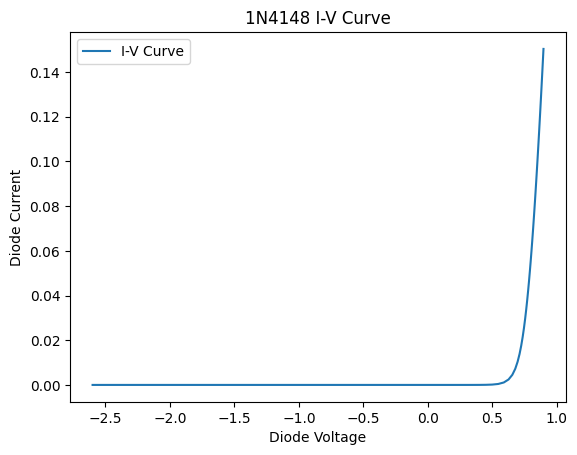

In [ ]:
plt.plot(v,i,label="I-V Curve")
plt.xlabel("Diode Voltage")
plt.ylabel("Diode Current")
plt.title("1N4148 I-V Curve")
plt.legend()

In [ ]:
def func(i, i_s, eta, rs):
  return np.log(i/i_s+1)*eta*0.025887 + rs*i

popt, pcov = curve_fit(func, i, v, p0 = [2.52e-09, 1.752, 0.568])

<ipython-input-59-9fa939965a21>:2: RuntimeWarning: invalid value encountered in log
  return np.log(i/i_s+1)*eta*0.025887 + rs*i
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [ ]:
popt

array([2.520e-09, 1.752e+00, 5.680e-01])

In [ ]:
def fitted_i(i, v, i_s, eta, rs):
  return i_s*(np.exp((v-rs*i)/(eta*0.025887))-1)


def recursive_fitted_2(i, v, i_s, eta, rs):
  i_1 = fitted_i(i, v, i_s, eta, rs)

  return fitted_i(i_1, v, i_s, eta, rs)


def recursive_fitted_3(i, v, i_s, eta, rs):
  i_1 = fitted_i(i, v, i_s, eta, rs)
  i_2 = fitted_i(i_1, v, i_s, eta, rs)

  return fitted_i(i_2, v, i_s, eta, rs)

Text(0.5, 1.0, '1N4148 I-V Curve')

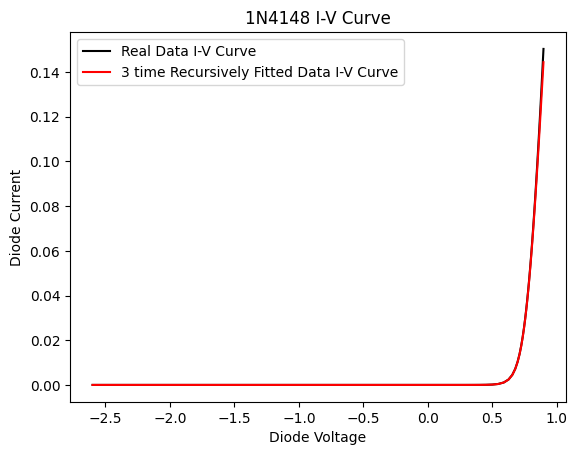

In [ ]:
plt.plot(v, i, label="Real Data I-V Curve", color="black")
plt.plot(v, recursive_fitted_3(i, v, 2.520e-09, 1.752e+00, 5.680e-01), label="3 time Recursively Fitted Data I-V Curve", color="red")
plt.legend()
plt.xlabel("Diode Voltage")
plt.ylabel("Diode Current")
plt.title("1N4148 I-V Curve")

(0.06, 0.15)

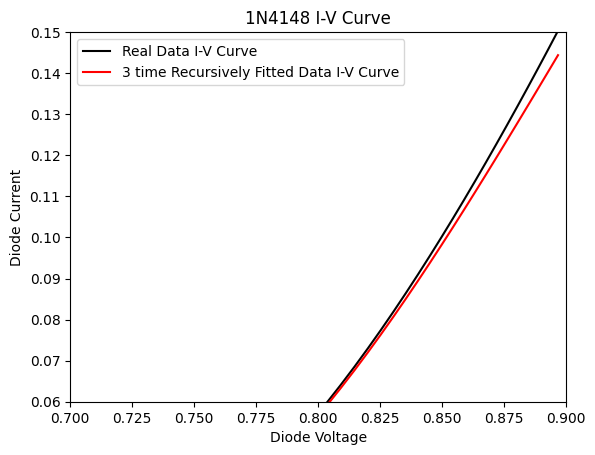

In [ ]:
plt.plot(v, i, label="Real Data I-V Curve", color="black")
plt.plot(v, recursive_fitted_3(i, v, 2.520e-09, 1.752e+00, 5.680e-01), label="3 time Recursively Fitted Data I-V Curve", color="red")
plt.legend()
plt.xlabel("Diode Voltage")
plt.ylabel("Diode Current")
plt.title("1N4148 I-V Curve")
plt.xlim(0.7,0.9)
plt.ylim(0.06,0.15)

In [ ]:
fit_1 = fitted_i(i, v, 2.520e-09, 1.752e+00, 5.680e-01)
fit_2 = recursive_fitted_2(i, v, 2.520e-09, 1.752e+00, 5.680e-01)
fit_3 = recursive_fitted_3(i, v, 2.520e-09, 1.752e+00, 5.680e-01)

In [ ]:
sum = 0
for num in range(101):
  sum = sum + (fit_1[num]-i[num])**2

MSE = np.sqrt(sum/101)

MSE

0.0007551037288783788

In [ ]:
sum = 0
for num in range(101):
  sum = sum + (fit_2[num]-i[num])**2

MSE = np.sqrt(sum/101)

MSE

0.0004305232813321303

In [ ]:
sum = 0
for num in range(101):
  sum = sum + np.abs(fit_3[num]-i[num])/i[num]

MSE = np.sqrt(sum/101)

MSE

0.08186873560537447

In [ ]:
v_2 = [
    -2.600000e+00, -2.550000e+00, -2.500000e+00, -2.450000e+00, -2.400000e+00, -2.350000e+00, -2.300000e+00,
    -2.250000e+00, -2.200000e+00, -2.150000e+00, -2.100000e+00, -2.050000e+00, -2.000000e+00, -1.950000e+00,
    -1.900000e+00, -1.850000e+00, -1.800000e+00, -1.750000e+00, -1.700000e+00, -1.650000e+00, -1.600000e+00,
    -1.550000e+00, -1.500000e+00, -1.450000e+00, -1.400000e+00, -1.350000e+00, -1.300000e+00, -1.250000e+00,
    -1.200000e+00, -1.150000e+00, -1.100000e+00, -1.050000e+00, -1.000000e+00, -9.500000e-01, -9.000000e-01,
    -8.500000e-01, -8.000000e-01, -7.500000e-01, -7.000000e-01, -6.500000e-01, -6.000000e-01, -5.500000e-01,
    -5.000000e-01, -4.500000e-01, -4.000000e-01, -3.500000e-01, -3.000000e-01, -2.500000e-01, -2.000000e-01,
    -1.500000e-01, -1.000000e-01, -5.000000e-02, -9.575660e-16, 4.999995e-02, 9.999979e-02, 1.499993e-01,
    1.999979e-01, 2.499938e-01, 2.999811e-01, 3.499431e-01, 3.998289e-01, 4.494884e-01, 4.984934e-01,
    5.457439e-01, 5.890224e-01, 6.257302e-01, 6.549455e-01, 6.778334e-01, 6.961337e-01, 7.113306e-01,
    7.241530e-01, 7.353530e-01, 7.453533e-01, 7.544249e-01, 7.627627e-01, 7.705095e-01, 7.777715e-01,
    7.846296e-01, 7.911468e-01, 7.973724e-01, 8.033463e-01, 8.091009e-01, 8.146628e-01, 8.200540e-01,
    8.252932e-01, 8.303962e-01, 8.353765e-01, 8.402455e-01, 8.450135e-01, 8.496892e-01, 8.542801e-01,
    8.587933e-01, 8.632345e-01, 8.676093e-01, 8.719223e-01, 8.761778e-01, 8.803797e-01, 8.845316e-01,
    8.886365e-01, 8.926973e-01, 8.967167e-01, 9.006971e-01, 9.046406e-01, 9.085492e-01, 9.124248e-01,
    9.162692e-01, 9.200839e-01, 9.238704e-01, 9.276300e-01, 9.313640e-01, 9.350736e-01, 9.387600e-01, 9.424240e-01]

In [ ]:
i_2 = [
    -2.522599e-09, -2.522550e-09, -2.522499e-09, -2.522450e-09, -2.522400e-09, -2.522350e-09, -2.522300e-09, -2.522250e-09,
    -2.522200e-09, -2.522150e-09, -2.522100e-09, -2.522050e-09, -2.522000e-09, -2.521950e-09, -2.521900e-09, -2.521850e-09,
    -2.521800e-09, -2.521750e-09, -2.521700e-09, -2.521650e-09, -2.521600e-09, -2.521550e-09, -2.521500e-09, -2.521450e-09,
    -2.521400e-09, -2.521350e-09, -2.521300e-09, -2.521250e-09, -2.521200e-09, -2.521150e-09, -2.521100e-09, -2.521050e-09,
    -2.521000e-09, -2.520950e-09, -2.520900e-09, -2.520850e-09, -2.520800e-09, -2.520750e-09, -2.520699e-09, -2.520648e-09,
    -2.520596e-09, -2.520537e-09, -2.520459e-09, -2.520327e-09, -2.520030e-09, -2.519236e-09, -2.516941e-09, -2.510124e-09,
    -2.489676e-09, -2.428141e-09, -2.242756e-09, -1.684043e-09, -5.315848e-23, 5.076154e-09, 2.037718e-08, 6.649879e-08,
    2.055184e-07, 6.245149e-07, 1.887014e-06, 5.688111e-06, 1.710531e-05, 5.115822e-05, 1.506750e-04, 4.259480e-04,
    1.097759e-03, 2.427002e-03, 4.505521e-03, 7.216727e-03, 1.038665e-02, 1.387595e-02, 1.759018e-02, 2.146732e-02,
    2.546613e-02, 2.955840e-02, 3.372429e-02, 3.794942e-02, 4.222310e-02, 4.653721e-02, 5.088545e-02, 5.526286e-02,
    5.966544e-02, 6.408996e-02, 6.853376e-02, 7.299463e-02, 7.747070e-02, 8.196039e-02, 8.646237e-02, 9.097546e-02,
    9.549866e-02, 1.000311e-01, 1.045720e-01, 1.091207e-01, 1.136766e-01, 1.182391e-01, 1.228078e-01, 1.273822e-01,
    1.319620e-01, 1.365469e-01, 1.411363e-01, 1.457303e-01, 1.503283e-01, 0.1549303, 0.1595359, 0.1641451, 0.1687575,
    0.1733731, 0.1779916, 0.182613, 0.187237, 0.1918636, 0.1964926,
    0.201124, 0.2057576
]

(0.06, 0.15)

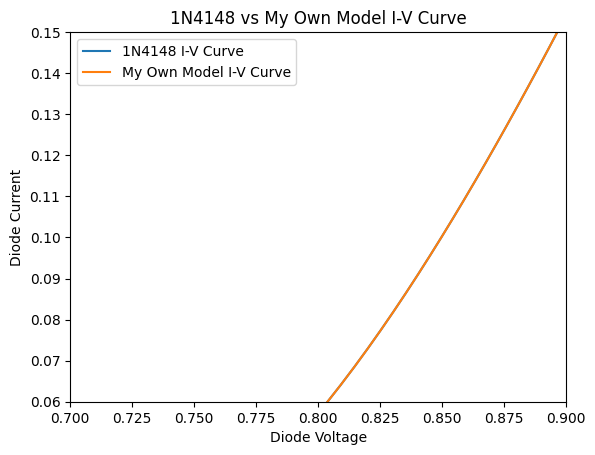

In [ ]:
plt.plot(v,i,label="1N4148 I-V Curve")
plt.plot(v_2, i_2, label="My Own Model I-V Curve")
plt.xlabel("Diode Voltage")
plt.ylabel("Diode Current")
plt.title("1N4148 vs My Own Model I-V Curve")
plt.legend()

plt.xlim(0.7,0.9)
plt.ylim(0.06,0.15)

In [ ]:
plt.plot(v,i,label="1N4148 I-V Curve")
plt.plot(v_2, i_2, label="My Own Model I-V Curve")
plt.xlabel("Diode Voltage")
plt.ylabel("Diode Current")
plt.title("1N4148 vs My Own Model I-V Curve")
plt.legend()

In [ ]:
sum = 0
for num in range(101):
  sum = sum + np.abs(i_2[num]-i[num])/i[num]

MSE = np.sqrt(sum/101)

MSE

0.0

# LAB 1 After-Lab

## I-V Characteristic

In [87]:
v = [-2.4206, -2.1093, -1.8199, -1.5293, -1.2103, -0.9096, -0.6092, -0.3095, -0.007, 0.0995, 0.1992, 0.2994, 0.4096, 0.599, 0.7128, 0.8176, 0.8950, 0.9114, 0.9213, 0.9321, 0.9384]
v_in = [-2.4207, -2.1094, -1.82, -1.5294, -1.2104, -0.9097, -0.6093, -0.3096, 0, 0.0996, 0.1993, 0.2995, 0.4098, 0.6092, 0.8, 1.2, 1.8, 2.0993, 2.2997, 2.5392, 2.7193]
ohm = 9.94

i_temp = []
for i in range(21):
  i_temp.append((v_in[i]-v[i])/ohm)

v = np.array(v)
v_in = np.array(v_in)
i_temp = np.array(i_temp)

[-1.006036217305946e-05,
 -1.0060362173014783e-05,
 -1.0060362173037122e-05,
 -1.0060362173037122e-05,
 -1.0060362173037122e-05,
 -1.0060362173037122e-05,
 -1.0060362173037122e-05,
 -1.0060362173037122e-05,
 0.0007042253521126761,
 1.0060362173037122e-05,
 1.0060362173039914e-05,
 1.0060362173037122e-05,
 2.0120724346074244e-05,
 0.001026156941649898,
 0.008772635814889343,
 0.03847082494969819,
 0.09104627766599599,
 0.11950704225352113,
 0.13867203219315896,
 0.1616800804828974,
 0.17916498993963784]

Text(0.5, 1.0, 'Diode Voltage - Supply Voltage Curve')

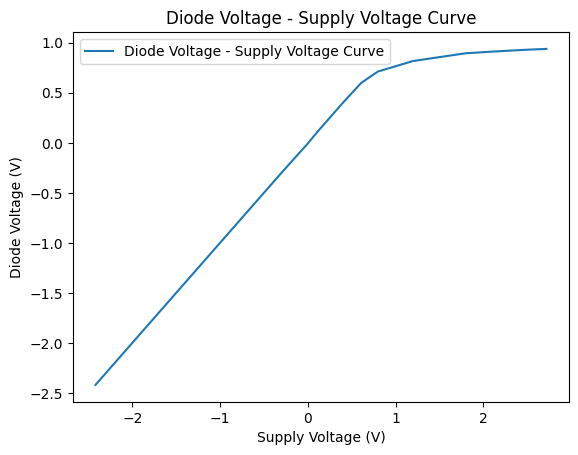

In [89]:
plt.plot(v_in, v, label="Diode Voltage - Supply Voltage Curve")
plt.ylabel("Diode Voltage (V)")
plt.xlabel("Supply Voltage (V)")
plt.legend()
plt.title("Diode Voltage - Supply Voltage Curve")

Text(0.5, 1.0, 'Diode Current - Diode Voltage Curve')

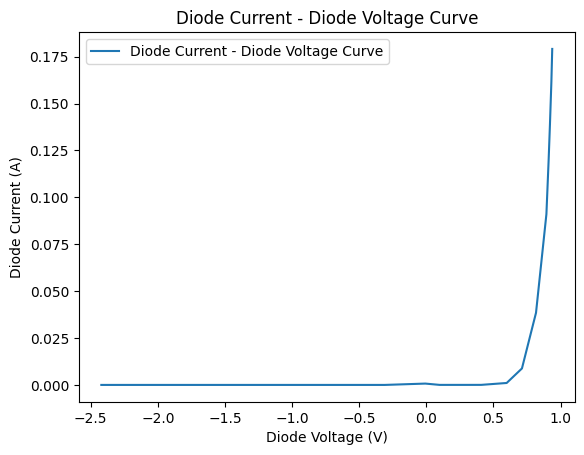

In [90]:
plt.plot(v, i_temp, label="Diode Current - Diode Voltage Curve")
plt.ylabel("Diode Current (A)")
plt.xlabel("Diode Voltage (V)")
plt.legend()
plt.title("Diode Current - Diode Voltage Curve")

In [75]:
def func(i, i_s, eta):
  return np.log(i/i_s+1)*eta*0.025887

popt, pcov = curve_fit(func, i_temp, v, p0 = [0.00005, 1.752])

<ipython-input-75-69165f280f62>:2: RuntimeWarning: invalid value encountered in log
  return np.log(i/i_s+1)*eta*0.025887


In [76]:
popt

array([1.00603699e-05, 3.74295903e+00])

In [80]:
def fitted_i(v, i_s, eta):
  return i_s*(np.exp(v/(eta*0.025887))-1)

fit_1 = fitted_i(v, 1.00603699e-05, 3.74295905e+00)

In [85]:
fit_1

array([-1.00603699e-05, -1.00603699e-05, -1.00603698e-05, -1.00603685e-05,
       -1.00603321e-05, -1.00595273e-05, -1.00416596e-05, -9.64790696e-06,
       -7.01167962e-07,  1.80320421e-05,  6.85465071e-05,  2.11031685e-04,
        6.79396885e-04,  4.85881610e-03,  1.57478544e-02,  4.64659976e-02,
        1.03301422e-01,  1.22354610e-01,  1.35518069e-01,  1.51498367e-01,
        1.61676681e-01])

Text(0.5, 1.0, '1N4148 I-V Curve')

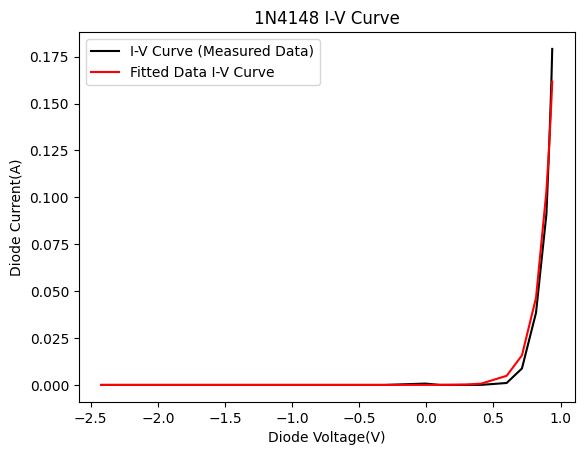

In [91]:
plt.plot(v, i_temp, label="I-V Curve (Measured Data)", color="black")
plt.plot(v, fit_1, label="Fitted Data I-V Curve", color="red")
plt.legend()
plt.xlabel("Diode Voltage(V)")
plt.ylabel("Diode Current(A)")
plt.title("1N4148 I-V Curve")

In [86]:
sum = 0
for num in range(21):
  sum = sum + (fit_1[num]-i_temp[num])**2

MSE = np.sqrt(sum/21)

MSE

0.005798169353789881

## DC Transfer Characteristics

0.7 0.09427

In [101]:
v_in = [-2.5, -2.3, -2.1, -1.9, -1.7, -1.5, -1.3, -1.1, -0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5]
v_out = [0,0,0,0,0,0,0,0,0,0,0,0,0,0.00001,0.00007,0.00024,0.00135,0.00952,0.03934,0.09427,0.16328,0.24013,0.32324,0.40412,0.4942,0.5813,0.6703,0.7619,0.8556,0.9479,1.0393,1.1324,1.225,1.3191,1.4139,1.5083,1.6027,1.6967]

v_in = np.array(v_in)
v_out = np.array(v_out)

Text(0.5, 1.0, 'DC Transfer Curve')

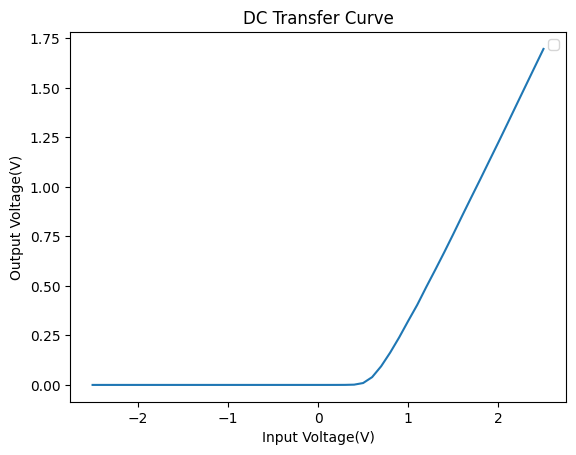

In [102]:
plt.plot(v_in, v_out)
plt.legend()
plt.xlabel("Input Voltage(V)")
plt.ylabel("Output Voltage(V)")
plt.title("DC Transfer Curve")

In [103]:
v_in = [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5]
v_out = [0.09427,0.16328,0.24013,0.32324,0.40412,0.4942,0.5813,0.6703,0.7619,0.8556,0.9479,1.0393,1.1324,1.225,1.3191,1.4139,1.5083,1.6027,1.6967]

In [104]:
def func(v_in, a, b):
  return a*v_in + b

popt, pcov = curve_fit(func, v_in, v_out, p0 = [1, -0.7])

In [105]:
popt

array([ 0.90234702, -0.57672154])

0.7 0.601

In [124]:
v_in = [-2.5, -2.4, -2.3, -2.2, -2.1, -2, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5]
v_out = [-2.4975, -2.3981, -2.2981, -2.1972, -2.0962, -1.9961, -1.8967, -1.7962, -1.6971, -1.5967, -1.4958, -1.3965, -1.2969, -1.1974, -1.0968, -0.9972, -0.8971, -0.7981, -0.6983, -0.5968, -0.4969, -0.39675, -0.29712, -0.1973, -0.0968, -0.00145, 0.09703, 0.1973, 0.2972, 0.3957, 0.4878, 0.5569, 0.601, 0.6294, 0.6501, 0.6662, 0.6799, 0.6911, 0.701, 0.7097, 0.7176, 0.725, 0.7318, 0.7381, 0.7436, 0.7491, 0.7546, 0.7596, 0.7638, 0.768, 0.7735]

v_in = np.array(v_in)
v_out = np.array(v_out)

Text(0.5, 1.0, 'DC Transfer Curve')

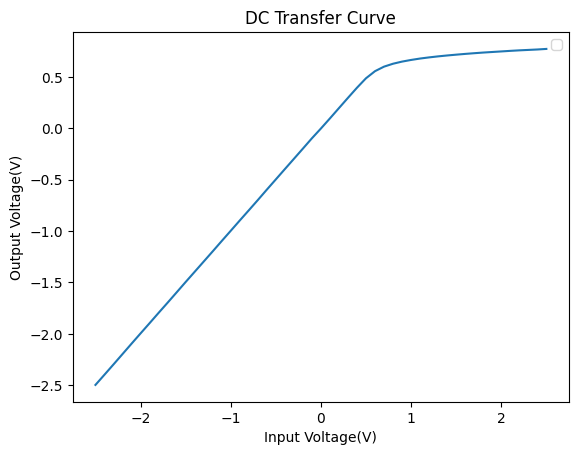

In [114]:
plt.plot(v_in, v_out)
plt.legend()
plt.xlabel("Input Voltage(V)")
plt.ylabel("Output Voltage(V)")
plt.title("DC Transfer Curve")

In [115]:
v_in = [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5]
v_out = [0.601, 0.6294, 0.6501, 0.6662, 0.6799, 0.6911, 0.701, 0.7097, 0.7176, 0.725, 0.7318, 0.7381, 0.7436, 0.7491, 0.7546, 0.7596, 0.7638, 0.768, 0.7735]

In [116]:
def func(v_in, a, b):
  return a*v_in + b

popt, pcov = curve_fit(func, v_in, v_out, p0 = [0.1, 0.3])

In [117]:
popt

array([0.08459474, 0.57796947])

In [118]:
v_in = [-2.5, -2.4, -2.3, -2.2, -2.1, -2, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
v_out = [-2.4975, -2.3981, -2.2981, -2.1972, -2.0962, -1.9961, -1.8967, -1.7962, -1.6971, -1.5967, -1.4958, -1.3965, -1.2969, -1.1974, -1.0968, -0.9972, -0.8971, -0.7981, -0.6983, -0.5968, -0.4969, -0.39675, -0.29712, -0.1973, -0.0968, -0.00145, 0.09703, 0.1973, 0.2972, 0.3957, 0.4878, 0.5569, 0.601]

In [119]:
def func(v_in, a, b):
  return a*v_in + b

popt, pcov = curve_fit(func, v_in, v_out, p0 = [0.1, 0.3])

In [120]:
popt

array([ 0.99042941, -0.01146777])

In [140]:
v_in = [-2.5, -2.4, -2.3, -2.2, -2.1, -2, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5]
v_out = [-2.4975, -2.3981, -2.2981, -2.1972, -2.0962, -1.9961, -1.8967, -1.7962, -1.6971, -1.5967, -1.4958, -1.3965, -1.2969, -1.1974, -1.0968, -0.9972, -0.8971, -0.7981, -0.6983, -0.5968, -0.4969, -0.39675, -0.29712, -0.1973, -0.0968, -0.00145, 0.09703, 0.1973, 0.2972, 0.3957, 0.4878, 0.5569, 0.601, 0.6294, 0.6501, 0.6662, 0.6799, 0.6911, 0.701, 0.7097, 0.7176, 0.725, 0.7318, 0.7381, 0.7436, 0.7491, 0.7546, 0.7596, 0.7638, 0.768, 0.7735]

v_in = np.array(v_in)
v_out = np.array(v_out)

In [136]:
data = """
-2.500000000000000e+00	-2.499900e+00
-2.400000000000000e+00	-2.399900e+00
-2.300000000000000e+00	-2.299900e+00
-2.200000000000000e+00	-2.199900e+00
-2.100000000000000e+00	-2.099900e+00
-2.000000000000000e+00	-1.999900e+00
-1.899999999999999e+00	-1.899900e+00
-1.799999999999999e+00	-1.799900e+00
-1.699999999999999e+00	-1.699900e+00
-1.599999999999999e+00	-1.599900e+00
-1.499999999999999e+00	-1.499900e+00
-1.399999999999999e+00	-1.399900e+00
-1.299999999999999e+00	-1.299900e+00
-1.199999999999999e+00	-1.199900e+00
-1.099999999999999e+00	-1.099900e+00
-9.999999999999988e-01	-9.999000e-01
-8.999999999999988e-01	-8.999000e-01
-7.999999999999988e-01	-7.999001e-01
-6.999999999999988e-01	-6.999001e-01
-5.999999999999989e-01	-5.999002e-01
-4.999999999999989e-01	-4.999006e-01
-3.999999999999989e-01	-3.999016e-01
-2.999999999999989e-01	-2.999045e-01
-1.999999999999989e-01	-1.999127e-01
-9.999999999999892e-02	-9.993562e-02
1.082467449009528e-15	9.156755e-12
1.000000000000011e-01	9.981959e-02
2.000000000000011e-01	1.993163e-01
3.000000000000011e-01	2.979299e-01
4.000000000000011e-01	3.942333e-01
5.000000000000011e-01	4.850982e-01
6.000000000000011e-01	5.656320e-01
7.000000000000011e-01	6.318167e-01
8.000000000000010e-01	6.835655e-01
9.000000000000010e-01	7.236997e-01
1.000000000000001e+00	7.553879e-01
1.100000000000001e+00	7.812063e-01
1.200000000000001e+00	8.024888e-01
1.300000000000001e+00	8.205693e-01
1.400000000000001e+00	8.362307e-01
1.500000000000002e+00	8.499960e-01
1.600000000000002e+00	8.622467e-01
1.700000000000002e+00	8.732656e-01
1.800000000000002e+00	8.832658e-01
1.900000000000002e+00	8.924116e-01
2.000000000000002e+00	9.008318e-01
2.100000000000002e+00	9.086287e-01
2.200000000000002e+00	9.158851e-01
2.300000000000002e+00	9.226686e-01
2.400000000000002e+00	9.290352e-01
2.500000000000000e+00	9.350318e-01
"""

# Split the data into lines
lines = data.strip().split('\n')

# Extract the second value from each line and convert to float
v_in_simul = [float(line.split()[0]) for line in lines]
v_out_simul = [float(line.split()[1]) for line in lines]

Text(0.5, 1.0, 'DC Transfer Curve')

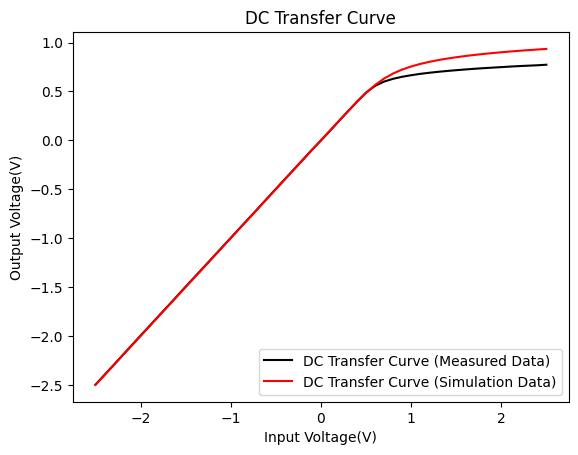

In [141]:
plt.plot(v_in, v_out, label="DC Transfer Curve (Measured Data)", color="black")
plt.plot(v_in_simul, v_out_simul, label="DC Transfer Curve (Simulation Data)", color="red")
plt.legend()
plt.xlabel("Input Voltage(V)")
plt.ylabel("Output Voltage(V)")
plt.title("DC Transfer Curve")

In [142]:
sum = 0
for num in range(51):
  sum = sum + (v_out_simul[num]-v_out[num])**2

MSE = np.sqrt(sum/51)

MSE

0.07903605320394635

In [132]:
v_in = [-2.5, -2.3, -2.1, -1.9, -1.7, -1.5, -1.3, -1.1, -0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5]
v_out = [0,0,0,0,0,0,0,0,0,0,0,0,0,0.00001,0.00007,0.00024,0.00135,0.00952,0.03934,0.09427,0.16328,0.24013,0.32324,0.40412,0.4942,0.5813,0.6703,0.7619,0.8556,0.9479,1.0393,1.1324,1.225,1.3191,1.4139,1.5083,1.6027,1.6967]

In [133]:
data = """
-2.500000000000000e+00	-1.000001e-04
-2.400000000000000e+00	-1.000001e-04
-2.300000000000000e+00	-1.000001e-04
-2.200000000000000e+00	-1.000001e-04
-2.100000000000000e+00	-1.000001e-04
-2.000000000000000e+00	-1.000001e-04
-1.899999999999999e+00	-1.000001e-04
-1.799999999999999e+00	-1.000001e-04
-1.699999999999999e+00	-1.000001e-04
-1.599999999999999e+00	-1.000001e-04
-1.499999999999999e+00	-1.000001e-04
-1.399999999999999e+00	-1.000000e-04
-1.299999999999999e+00	-9.999994e-05
-1.199999999999999e+00	-9.999968e-05
-1.099999999999999e+00	-9.999892e-05
-9.999999999999988e-01	-9.999682e-05
-8.999999999999988e-01	-9.999090e-05
-7.999999999999988e-01	-9.997428e-05
-6.999999999999988e-01	-9.992759e-05
-5.999999999999989e-01	-9.979645e-05
-4.999999999999989e-01	-9.942801e-05
-3.999999999999989e-01	-9.839296e-05
-2.999999999999989e-01	-9.548532e-05
-1.999999999999989e-01	-8.731785e-05
-9.999999999999892e-02	-6.438032e-05
1.082467449009528e-15	-9.155673e-12
1.000000000000011e-01	1.804070e-04
2.000000000000011e-01	6.836596e-04
3.000000000000011e-01	2.070152e-03
4.000000000000011e-01	5.766755e-03
5.000000000000011e-01	1.490177e-02
6.000000000000011e-01	3.436793e-02
7.000000000000011e-01	6.818325e-02
8.000000000000010e-01	1.164345e-01
9.000000000000010e-01	1.763003e-01
1.000000000000001e+00	2.446121e-01
1.100000000000001e+00	3.187937e-01
1.200000000000001e+00	3.975112e-01
1.300000000000001e+00	4.794308e-01
1.400000000000001e+00	5.637693e-01
1.500000000000002e+00	6.500040e-01
1.600000000000002e+00	7.377533e-01
1.700000000000002e+00	8.267345e-01
1.800000000000002e+00	9.167342e-01
1.900000000000002e+00	1.007588e+00
2.000000000000002e+00	1.099168e+00
2.100000000000002e+00	1.191371e+00
2.200000000000002e+00	1.284115e+00
2.300000000000002e+00	1.377331e+00
2.400000000000002e+00	1.470965e+00
2.500000000000000e+00	1.564968e+00

"""

# Split the data into lines
lines = data.strip().split('\n')

# Extract the second value from each line and convert to float
v_in_simul = [float(line.split()[0]) for line in lines]
v_out_simul = [float(line.split()[1]) for line in lines]

Text(0.5, 1.0, 'DC Transfer Curve')

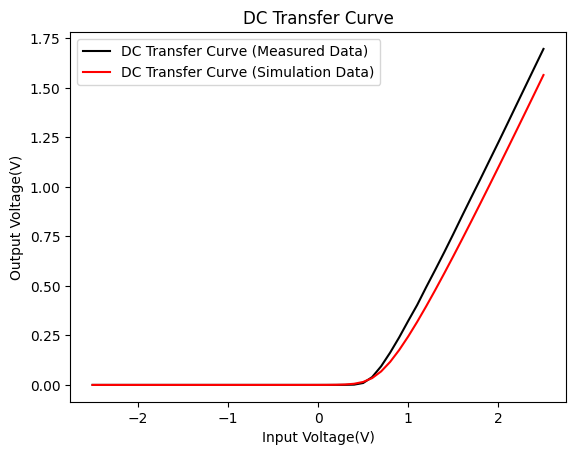

In [134]:
plt.plot(v_in, v_out, label="DC Transfer Curve (Measured Data)", color="black")
plt.plot(v_in_simul, v_out_simul, label="DC Transfer Curve (Simulation Data)", color="red")
plt.legend()
plt.xlabel("Input Voltage(V)")
plt.ylabel("Output Voltage(V)")
plt.title("DC Transfer Curve")

In [138]:
v_out = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00001,0.00007,0.00024,0.00135,0.00952,0.03934,0.09427,0.16328,0.24013,0.32324,0.40412,0.4942,0.5813,0.6703,0.7619,0.8556,0.9479,1.0393,1.1324,1.225,1.3191,1.4139,1.5083,1.6027,1.6967]

In [139]:
sum = 0
for num in range(51):
  sum = sum + (v_out_simul[num]-v_out[num])**2

MSE = np.sqrt(sum/51)

MSE

1.0786284929665926